# 中文情感分析

- 数据分析
- 预处理
- 词向量
- TextCNN

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from collections import Counter
import tqdm
import jieba
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
tf.__version__

'1.11.0-rc0'

## 数据分析

In [4]:
os.listdir('./data/')

['chinese_stopwords.txt', 'neg.txt', 'pos.txt']

In [5]:
with open('./data/pos.txt', 'r') as f:
    pos_text = f.readlines()
with open('./data/neg.txt', 'r') as f:
    neg_text = f.readlines()

In [6]:
pos_text[:5]

['质量好,做工也不错,尺码标准,\n',
 '裤子质量很好，裤型不错，而且穿起来显瘦，性比价高，是我喜欢的布料，不起球，值得购买，\n',
 '做工很好，货真价实，质量不错满意！\n',
 '真是不错呢！裤子质量很好，穿着也很有型，帅帅的，更喜欢他了呢！快递很快，态度也特别好，跟客服咨询问题能够得到快快速的回答，下次还会光顾，么么哒\n',
 '品质还可以，就是有点掉色，可以接受\n']

In [7]:
neg_text[:5]

['穿上不舒服，颜色和质感跟图片差异很大，建议慎重购买！后悔了！\n',
 '真心垃圾，以后再也不会买班尼路了\n',
 '物流超慢，整整6天多，准备退订了才到，无语。衣服质量嘛，中下水准，穿着不太舒服。衣服穿起来的外形跟农民工差不多，设计太垃圾了。总之不值这个价，三分之一的价格买来都觉得亏。谁买谁哭！\n',
 '这个T恤不安逸得，和农贸市场一二十的差不多样\n',
 '你以为是Lee那就错了，你以为会有Lee一半的品质，那就又错了，你以为会送货很快，那就又错了！\n']

In [8]:
pos_segs = [" ".join(jieba.cut(x)) for x in pos_text]
neg_segs = [" ".join(jieba.cut(x)) for x in neg_text]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wg/fjh1kvtj1v5g555zy343tkkm0000gn/T/jieba.cache
Loading model cost 0.713 seconds.
Prefix dict has been built succesfully.


In [9]:
pos_segs[:5]

['质量 好 , 做工 也 不错 , 尺码 标准 , \n',
 '裤子 质量 很 好 ， 裤型 不错 ， 而且 穿 起来 显瘦 ， 性 比价 高 ， 是 我 喜欢 的 布料 ， 不 起球 ， 值得 购买 ， \n',
 '做工 很 好 ， 货真价实 ， 质量 不错 满意 ！ \n',
 '真是 不错 呢 ！ 裤子 质量 很 好 ， 穿着 也 很 有 型 ， 帅帅 的 ， 更 喜欢 他 了 呢 ！ 快递 很快 ， 态度 也 特别 好 ， 跟 客服 咨询 问题 能够 得到 快 快速 的 回答 ， 下次 还会 光顾 ， 么 么 哒 \n',
 '品质 还 可以 ， 就是 有点 掉色 ， 可以 接受 \n']

In [10]:
neg_segs[:5]

['穿 上 不 舒服 ， 颜色 和 质感 跟 图片 差异 很大 ， 建议 慎重 购买 ！ 后悔 了 ！ \n',
 '真心 垃圾 ， 以后 再也不会 买 班尼路 了 \n',
 '物流 超慢 ， 整整 6 天多 ， 准备 退订 了 才 到 ， 无 语 。 衣服 质量 嘛 ， 中 下 水准 ， 穿着 不太 舒服 。 衣服 穿 起来 的 外形 跟 农民工 差不多 ， 设计 太 垃圾 了 。 总之 不值 这个 价 ， 三分之一 的 价格 买来 都 觉得 亏 。 谁 买 谁 哭 ！ \n',
 '这个 T恤 不 安逸 得 ， 和 农贸市场 一二十 的 差不多 样 \n',
 '你 以为 是 Lee 那 就 错 了 ， 你 以为 会 有 Lee 一半 的 品质 ， 那 就 又 错 了 ， 你 以为 会 送货 很快 ， 那 就 又 错 了 ！ \n']

### 数据分布

In [11]:
print('-' * 20 + ' POSITIVE TEXT ' + '-' * 20)
print("Total number: {}".format(len(pos_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in pos_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in pos_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in pos_segs])))
pos_text_seg = " ".join(pos_segs)
c = Counter(pos_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

print("-" * 20 + " NEGATIVE TEXT " + "-" * 20)
print("Total number: {}".format(len(neg_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in neg_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in neg_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in neg_segs])))
neg_text_seg = " ".join(neg_segs)
c = Counter(neg_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

-------------------- POSITIVE TEXT --------------------
Total number: 25000
Average length: 32.187
Max length: 804
Min length: 2
Most common words : 
[('，', 84928), ('的', 37743), ('。', 25705), ('很', 19492), ('了', 16266), ('好', 13058), ('不错', 11836), ('！', 10658), ('也', 8951), ('是', 8485), (',', 7216), ('还', 6902), ('酒店', 5990), ('买', 5980), ('我', 5585), ('在', 4998), ('都', 4706), ('有', 4503), ('就', 4219), ('用', 4105), ('京东', 4070), ('房间', 4015), ('非常', 3894), ('可以', 3800), ('不', 3542), ('.', 3366), ('质量', 3165), ('没有', 3140), ('就是', 3108), ('服务', 2962), ('感觉', 2866), ('和', 2796), ('苹果', 2671), ('比较', 2664), ('喜欢', 2655), ('到', 2575), ('给', 2569), ('还是', 2538), ('挺', 2378), ('满意', 2204), ('这个', 2153), ('快', 2139), ('价格', 2118), ('、', 2040), ('裤子', 2005), ('舒服', 1887), ('住', 1867), ('上', 1833), ('物流', 1829), ('大', 1801), ('快递', 1796), ('收到', 1768), ('一个', 1760), ('方便', 1734), ('东西', 1707), ('吃', 1694), ('去', 1673), ('速度', 1671), ('但', 1655), ('下次', 1640), ('没', 1606), ('包装', 1586), ('一直',

从中可以看出高频词中有很多是无意义的停用词，因此我们进一步对数据进行去停用词操作。

## 预处理

In [12]:
stopword_path = '/Users/huih/pinduoduo/stopwords/chinese_stopwords.txt'


# 创建停用词列表
def get_stop_words():
    stopwords = [line.strip() for line in open(stopword_path, encoding='UTF-8').readlines()]
    stopwords += [",", "'"]
    return stopwords
stopwords = get_stop_words()

pos_segs_without_stop = []
for sentence in pos_segs:
    sentWords = [x.strip() for x in sentence.split(' ') if x.strip() and x.strip() not in stopwords]
    pos_segs_without_stop.append(' '.join(sentWords))

pos_segs_without_stop[:10]

['质量 做工 不错 尺码 标准',
 '裤子 质量 裤型 不错 穿 起来 显瘦 性 比价 高 喜欢 布料 起球 值得 购买',
 '做工 货真价实 质量 不错 满意',
 '真是 不错 裤子 质量 穿着 型 帅帅 更 喜欢 快递 很快 态度 特别 客服 咨询 问题 能够 得到 快 快速 回答 下次 还会 光顾 哒',
 '品质 有点 掉色 接受',
 '质量 不错 尺码 大小 合适 喜欢',
 '喜欢 满意 下次 会 不会 掉色 质量 不错',
 '质量 不错 价格 贵 穿 裤型 快递 小哥 超级 赞',
 '裤子 没有 色差 尺码 正好 弹力 真心 不错',
 '裤子 真心 不错 店家 态度 还会 光顾']

In [13]:
neg_segs_without_stop = []
for sentence in neg_segs:
    sentWords = [x.strip() for x in sentence.split(' ') if x.strip() and x.strip() not in stopwords]
    neg_segs_without_stop.append(' '.join(sentWords))

neg_segs_without_stop[:10]

['穿 舒服 颜色 质感 图片 差异 很大 建议 慎重 购买 后悔',
 '真心 垃圾 以后 再也不会 买 班尼路',
 '物流 超慢 整整 天多 准备 退订 语 衣服 质量 中 水准 穿着 不太 舒服 衣服 穿 起来 外形 农民工 差不多 设计 太 垃圾 不值 价 三分之一 价格 买来 觉得 亏 买 哭',
 'T恤 安逸 农贸市场 一二十 差不多 样',
 'Lee 错 会 Lee 一半 品质 错 会 送货 很快 错',
 '语 - 裙子',
 '发货 慢 10 天才 收到 质量 差 线头 松动 第二天 起毛 建议 不要 买 过来人 他家 忠告',
 '只能 说 质量 很差 肯定 正品',
 '图片',
 '差评 半 蓝色 发 黑色 32 - 发 31']

In [14]:
# 对去停用词后对数据进行统计分析
pos_segs = pos_segs_without_stop
neg_segs = neg_segs_without_stop

print('-' * 20 + ' POSITIVE TEXT ' + '-' * 20)
print("Total number: {}".format(len(pos_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in pos_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in pos_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in pos_segs])))
pos_text_seg = " ".join(pos_segs)
c = Counter(pos_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

print("-" * 20 + " NEGATIVE TEXT " + "-" * 20)
print("Total number: {}".format(len(neg_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in neg_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in neg_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in neg_segs])))
neg_text_seg = " ".join(neg_segs)
c = Counter(neg_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

-------------------- POSITIVE TEXT --------------------
Total number: 25000
Average length: 17.1128
Max length: 427
Min length: 0
Most common words : 
[('不错', 11836), ('酒店', 5990), ('买', 5980), ('京东', 4070), ('房间', 4015), ('非常', 3894), ('.', 3366), ('质量', 3165), ('没有', 3140), ('服务', 2962), ('感觉', 2866), ('苹果', 2671), ('比较', 2664), ('喜欢', 2655), ('挺', 2378), ('满意', 2204), ('快', 2139), ('价格', 2118), ('裤子', 2005), ('舒服', 1887), ('住', 1867), ('物流', 1829), ('快递', 1796), ('收到', 1768), ('一个', 1760), ('方便', 1734), ('东西', 1707), ('吃', 1694), ('速度', 1671), ('下次', 1640), ('没', 1606), ('包装', 1586), ('一直', 1558), ('说', 1553), ('穿', 1529), ('入住', 1513), ('有点', 1509), ('很快', 1453), ('购买', 1369), ('早餐', 1354), ('值得', 1318), ('味道', 1296), ('特别', 1239), ('会', 1169), ('合适', 1136), ('便宜', 1124), ('好吃', 1063), ('真的', 1057), ('实惠', 1045), ('大小', 1038), ('好评', 1021), ('活动', 990), ('华为', 957), ('平板', 943), ('起来', 939), ('高', 935), ('性价比', 927), ('新鲜', 926), ('购物', 924), ('设施', 910), ('环境', 901), ('以后', 891), 

从上可以看出，去停用词后句子的平均长度由32和34变成了17，最大长度由804和1280变成了427和607(说明差评的平均长度要长于好评)。
最小长度有2和1变成了0，说明数据中有些无效样本可以进一步删除。

In [15]:
while '' in pos_segs:
    pos_segs.remove('')
while '' in neg_segs:
    neg_segs.remove('')
print("Min length for pos text: {}".format(np.min([len(sentence.split()) for sentence in pos_segs])))
print("Min length for neg text: {}".format(np.min([len(sentence.split()) for sentence in neg_segs])))

Min length for pos text: 1
Min length for neg text: 1


In [16]:
print('-' * 20 + ' POSITIVE TEXT ' + '-' * 20)
print("Total number: {}".format(len(pos_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in pos_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in pos_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in pos_segs])))
pos_text_seg = " ".join(pos_segs)
c = Counter(pos_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

print("-" * 20 + " NEGATIVE TEXT " + "-" * 20)
print("Total number: {}".format(len(neg_segs)))
print("Average length: {}".format(np.mean([len(sentence.split()) for sentence in neg_segs])))
print("Max length: {}".format(np.max([len(sentence.split()) for sentence in neg_segs])))
print("Min length: {}".format(np.min([len(sentence.split()) for sentence in neg_segs])))
neg_text_seg = " ".join(neg_segs)
c = Counter(neg_text_seg.split()).most_common(100)
print("Most common words : \n{} \n".format(c))

-------------------- POSITIVE TEXT --------------------
Total number: 24967
Average length: 17.135418752753633
Max length: 427
Min length: 1
Most common words : 
[('不错', 11836), ('酒店', 5990), ('买', 5980), ('京东', 4070), ('房间', 4015), ('非常', 3894), ('.', 3366), ('质量', 3165), ('没有', 3140), ('服务', 2962), ('感觉', 2866), ('苹果', 2671), ('比较', 2664), ('喜欢', 2655), ('挺', 2378), ('满意', 2204), ('快', 2139), ('价格', 2118), ('裤子', 2005), ('舒服', 1887), ('住', 1867), ('物流', 1829), ('快递', 1796), ('收到', 1768), ('一个', 1760), ('方便', 1734), ('东西', 1707), ('吃', 1694), ('速度', 1671), ('下次', 1640), ('没', 1606), ('包装', 1586), ('一直', 1558), ('说', 1553), ('穿', 1529), ('入住', 1513), ('有点', 1509), ('很快', 1453), ('购买', 1369), ('早餐', 1354), ('值得', 1318), ('味道', 1296), ('特别', 1239), ('会', 1169), ('合适', 1136), ('便宜', 1124), ('好吃', 1063), ('真的', 1057), ('实惠', 1045), ('大小', 1038), ('好评', 1021), ('活动', 990), ('华为', 957), ('平板', 943), ('起来', 939), ('高', 935), ('性价比', 927), ('新鲜', 926), ('购物', 924), ('设施', 910), ('环境', 901), ('

正样本数量从25000变成了24967，负样本数量从25000变成了24964.

样本的平均长度为17，我们取20作为句子长度。

In [17]:
SENTENCE_LIMIT_SIZE = 20

## 词向量


### 构造词典
由于语料中还含有很多低频词，在构建词典时需要将这些词过滤掉，这样不仅可以加快模型的执行效率，还能减少特殊词带来的噪声干扰。

In [18]:
c = Counter(' '.join(pos_segs + neg_segs).split())
sorted(c.most_common(), key=lambda x: x[1])[:20]

[('数选', 1),
 ('服务文明', 1),
 ('墨绿色', 1),
 ('买该', 1),
 ('第一波', 1),
 ('救灾', 1),
 ('手起刀落', 1),
 ('资量', 1),
 ('适服', 1),
 ('挺酷', 1),
 ('不太显', 1),
 ('自找麻烦', 1),
 ('亲快', 1),
 ('何乐不为', 1),
 ('一以', 1),
 ('超有', 1),
 ('这价能', 1),
 ('浸水', 1),
 ('版式', 1),
 ('赞得', 1)]

In [19]:
# 初始化两个token：pad和unk
vocab = ["<pad>", "<unk>"]

# 去除出现频次为1次的单词
for w, f in c.most_common():
    if f > 1:
        vocab.append(w)
print("Total size of vocabulary is: {}".format(len(vocab)))

Total size of vocabulary is: 22831


### 构造映射
构造将单词转换为编码和将编码转为单词的映射

In [20]:
word_to_token = {word: token for token, word in enumerate(vocab)}
token_to_word = {token: word for word, token in word_to_token.items()}

In [21]:
# 文本转token
def convert_text_to_token(sentence, word_to_token_map=word_to_token, limit_size=SENTENCE_LIMIT_SIZE):
    # 获取unknown单词和pad的token
    unk_id = word_to_token_map["<unk>"]
    pad_id = word_to_token_map["<pad>"]
    
    # 对句子进行token转换，对于未在词典中出现过的词用unk的token填充
    tokens = [word_to_token_map.get(word, unk_id) for word in sentence.lower().split()]
    
    # Pad
    if len(tokens) < limit_size:
        tokens.extend([0] * (limit_size - len(tokens)))
    # Trunc
    else:
        tokens = tokens[:limit_size]
    
    return tokens

In [22]:
pos_tokens = []

for sentence in tqdm.tqdm(pos_segs):
    tokens = convert_text_to_token(sentence)
    pos_tokens.append(tokens)

100%|██████████| 24967/24967 [00:00<00:00, 156588.04it/s]


In [23]:
pos_tokens[:3]

[[15, 210, 3, 337, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [24,
  15,
  2526,
  3,
  37,
  93,
  2718,
  4524,
  6424,
  112,
  27,
  495,
  1914,
  77,
  56,
  0,
  0,
  0,
  0,
  0],
 [210, 2527, 15, 3, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [24]:
neg_tokens = []

for sentence in tqdm.tqdm(neg_segs):
    tokens = convert_text_to_token(sentence)
    neg_tokens.append(tokens)
    
neg_tokens[:3]

100%|██████████| 24964/24964 [00:00<00:00, 103385.54it/s]


[[37,
  45,
  135,
  1342,
  180,
  2034,
  152,
  144,
  1327,
  56,
  372,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [224, 59, 51, 716, 2, 1611, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [34,
  2421,
  2891,
  11024,
  588,
  11786,
  696,
  80,
  15,
  164,
  1136,
  157,
  542,
  45,
  80,
  37,
  93,
  3238,
  20479,
  304]]

In [25]:
# 合并语料
pos_tokens = np.array(pos_tokens)
neg_tokens = np.array(neg_tokens)
total_tokens = np.concatenate((pos_tokens, neg_tokens), axis=0)
print("Shape of all tokens: ({}, {})".format(*total_tokens.shape))

Shape of all tokens: (49931, 20)


In [26]:
# 合并类标
pos_targets = np.ones((pos_tokens.shape[0]))
neg_targets = np.zeros((neg_tokens.shape[0]))
total_targets = np.concatenate((pos_targets, neg_targets), axis=0).reshape(-1, 1)
print("Shape of all labels: ({}, {})".format(*total_tokens.shape))

Shape of all labels: (49931, 20)


In [27]:
# 加载预训练word2vec词向量
with open("/Users/huih/Downloads/sgns.weibo.bigram-char", 'r') as f:
    words = set()
    word_to_vec = {}
    for line in f:
        line = line.strip().split()
        # 当前单词
        curr_word = line[0]
        words.add(curr_word)
        # 当前词向量
        word_to_vec[curr_word] = np.array(line[1:], dtype=np.float32)

In [28]:
len(words)
print("The number of words which have pretrained-vectors in vocab is: {}".format(len(set(vocab)&set(words))))
print()
print("The number of words which do not have pretrained-vectors in vocab is : {}".format(len(set(vocab))-
                                                                                         len(set(vocab)&set(words))))

The number of words which have pretrained-vectors in vocab is: 17904

The number of words which do not have pretrained-vectors in vocab is : 4927


In [29]:
len(vocab)

22831

In [30]:
# 在预训练词向量中的词
wordSet = set(vocab) & set(words)
print("Number of words in embedding : {}".format(len(wordSet)))
print("Number of words not in embedding : {}".format(len(set(vocab)) - len(wordSet)))

Number of words in embedding : 17904
Number of words not in embedding : 4927


### 构造词向量矩阵


In [31]:
VOCAB_SIZE = len(vocab)
EMBEDDING_SIZE = 300

static_embeddings = np.zeros([VOCAB_SIZE, EMBEDDING_SIZE])

for word, token in tqdm.tqdm(word_to_token.items()):
    # 用词向量填充，如果没有对应的词向量，则用随机数填充
    word_vector = word_to_vec.get(word, 0.2 * np.random.random(EMBEDDING_SIZE) - 0.1)
    static_embeddings[token, :] = word_vector

# 重置PAD为0向量
pad_id = word_to_token["<pad>"]
static_embeddings[pad_id, :] = np.zeros(EMBEDDING_SIZE)

100%|██████████| 22831/22831 [00:00<00:00, 55596.03it/s]


In [32]:
static_embeddings = static_embeddings.astype(np.float32)

### 数据集划分

In [33]:
x_train, x_test, y_train, y_test = train_test_split(total_tokens, total_targets, test_size=0.2, random_state=42, shuffle=True)

In [34]:
# 将训练集进一步划分为训练和验证集，将测试集留作模型测试使用
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [35]:
print("train:{}, val:{}, test:{}".format(len(y_train), len(y_val), len(y_test)))

train:31955, val:7989, test:9987


In [36]:
BATCH_SIZE = 256
def get_batch(x, y, batch_size=BATCH_SIZE, shuffle=True):
    assert x.shape[0] == y.shape[0], print("error shape!")
    # shuffle
    if shuffle:
        shuffled_index = np.random.permutation(range(x.shape[0]))

        x = x[shuffled_index]
        y = y[shuffled_index]
    
    # 统计共几个完整的batch
    n_batches = int(x.shape[0] / batch_size)
    
    for i in range(n_batches - 1):
        x_batch = x[i*batch_size: (i+1)*batch_size]
        y_batch = y[i*batch_size: (i+1)*batch_size]
    
        yield x_batch, y_batch

## CNN

In [37]:
# 清空图
tf.reset_default_graph()

filters_size = [2, 3, 4, 5]
num_filters = 100
# 超参数
BATCH_SIZE = 256
EPOCHES = 50
LEARNING_RATE = 0.003
L2_LAMBDA = 10
KEEP_PROB = 0.5

### 构建模型

In [38]:
with tf.name_scope("cnn"):
    with tf.name_scope("placeholders"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, 20), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="targets")
    
    # embeddings
    with tf.name_scope("embeddings"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embedding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name="embed")
        # 添加channel维度
        embed_expanded = tf.expand_dims(embed, -1, name="embed_expand")
    
    # 用来存储max-pooling的结果
    pooled_outputs = []

    # 迭代多个filter
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope("conv_maxpool_%s" % filter_size):
            filter_shape = [filter_size, EMBEDDING_SIZE, 1, num_filters]
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name="W")
            b = tf.Variable(tf.zeros(num_filters), name="b")

            conv = tf.nn.conv2d(input=embed_expanded, 
                                 filter=W, 
                                 strides=[1, 1, 1, 1], 
                                 padding="VALID",
                                 name="conv")

            # 激活
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name="activations")
            # 池化
            max_pooling = tf.nn.max_pool(value=a, 
                                    ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                    strides=[1, 1, 1, 1],
                                    padding="VALID",
                                    name="max_pooling")
            pooled_outputs.append(max_pooling)
    
    # 统计所有的filter
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))
    
    # dropout
    with tf.name_scope("dropout"):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)
    
    # output
    with tf.name_scope("output"):
        W = tf.get_variable("W", shape=(total_filters, 1), initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name="b")
        
        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name="predictions")
    
    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    # evaluation
    with tf.name_scope("evaluation"):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

### 训练模型

In [39]:
cnn_train_accuracy = []
cnn_test_accuracy = []
saver = tf.train.Saver()

TRAIN_FLAG = False

if TRAIN_FLAG:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        writer = tf.summary.FileWriter("./graphs/cnn", tf.get_default_graph())
        n_batches = int(x_train.shape[0] / BATCH_SIZE)

        for epoch in range(EPOCHES):
            total_loss = 0
            for x_batch, y_batch in get_batch(x_train, y_train):
                _, l = sess.run([optimizer, loss],
                                feed_dict={inputs: x_batch, 
                                           targets: y_batch})
                total_loss += l

            train_corrects = sess.run(accuracy, feed_dict={inputs: x_train, targets: y_train})
            train_acc = train_corrects / x_train.shape[0]
            cnn_train_accuracy.append(train_acc)

            val_corrects = sess.run(accuracy, feed_dict={inputs: x_val, targets: y_val})
            val_acc = val_corrects / x_val.shape[0]
            cnn_test_accuracy.append(val_acc)

            print("Training epoch: {}, Training loss: {:.4f}, Train accuracy: {:.4f}, Val accuracy: {:.4f}".format(epoch + 1, 
                                                                                                                    total_loss / n_batches,
                                                                                                                    train_acc,
                                                                                                                    val_acc))

        saver.save(sess, "checkpoints/cnn")
        writer.close()

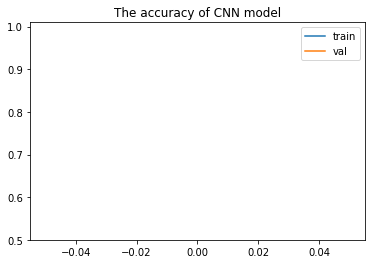

In [40]:
plt.plot(cnn_train_accuracy)
plt.plot(cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title("The accuracy of CNN model")
plt.legend(["train", "val"])

In [1]:
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")
    
    total_correct = sess.run(accuracy,
                             feed_dict={inputs: x_test, targets: y_test})

    print("The CNN model accuracy on test set: {:.2f}%".format(100 * total_correct / x_test.shape[0]))

NameError: name 'tf' is not defined